#  Importing data

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('diabetes.csv')

# Inspect data
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Check for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Split features and target
X = df.drop(columns=['Outcome','SkinThickness','DiabetesPedigreeFunction'])
y = df['Outcome']

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.40, random_state=101)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [9]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [10]:
# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       202
           1       0.64      0.61      0.63       106

    accuracy                           0.75       308
   macro avg       0.72      0.72      0.72       308
weighted avg       0.75      0.75      0.75       308



In [11]:
# Random Forest (alternative model)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


# Evaluate the model
print("Randon Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Randon Forest Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       202
           1       0.65      0.69      0.67       106

    accuracy                           0.77       308
   macro avg       0.74      0.75      0.74       308
weighted avg       0.77      0.77      0.77       308



In [15]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)

print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


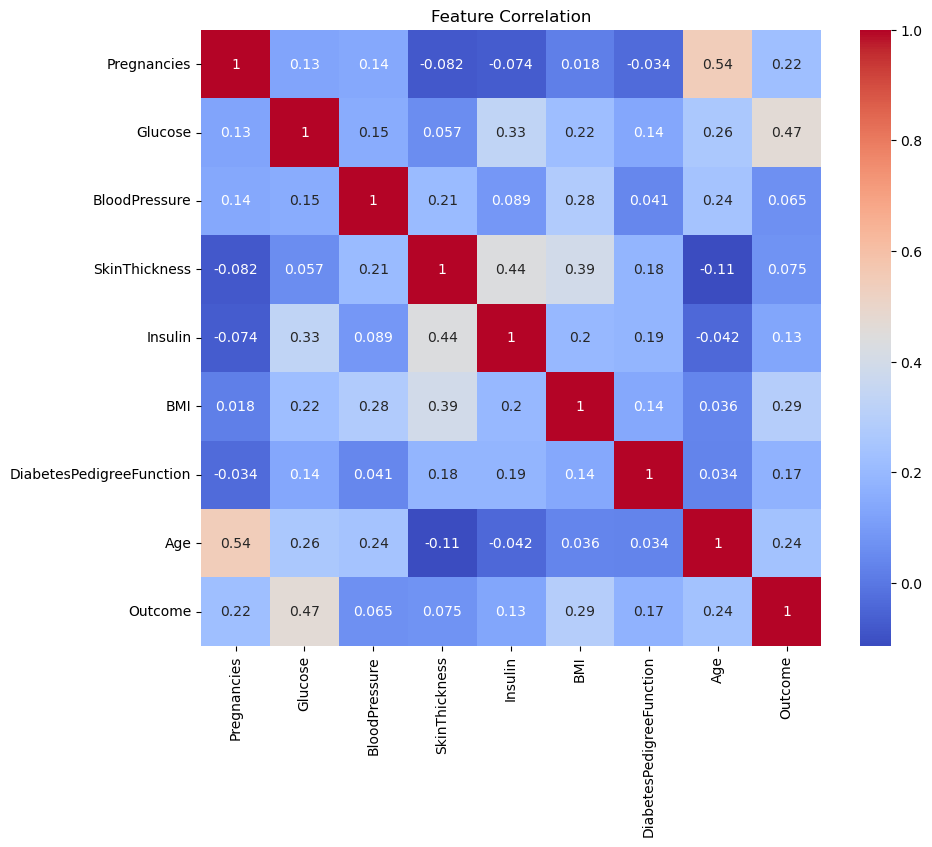

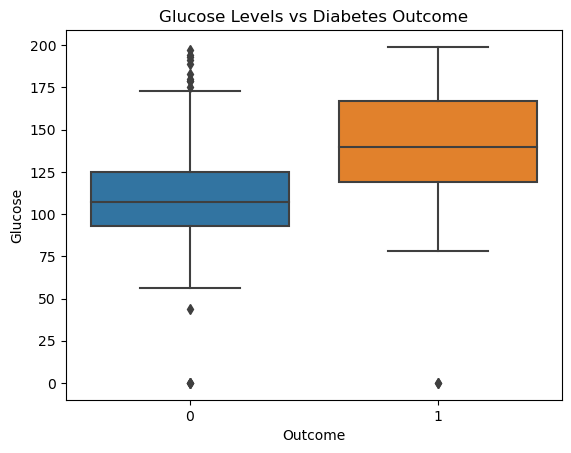

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Glucose vs Outcome
sns.boxplot(data=df, x='Outcome', y='Glucose')
plt.title('Glucose Levels vs Diabetes Outcome')
plt.show()

In [14]:
# Flask app
import pickle
from flask import Flask, request, render_template

app = Flask(__name__)

# Load the model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    features = [float(x) for x in request.form.values()]
    prediction = model.predict([features])
    result = 'Diabetic' if prediction[0] == 1 else 'Non-Diabetic'
    return render_template('result.html', result=result)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/Users/apsarg/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 15, in <module>
    from ipykernel import kernelapp as app
  File "/Users/apsarg/anaconda3/lib/python3.11/site-packages/ipykernel/__init__.py", line 5, in <module>
    from .connect import *  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/apsarg/anaconda3/lib/python3.11/site-packages/ipykernel/connect.py", line 11, in <module>
    import jupyter_client
  File "/Users/apsarg/anaconda3/lib/python3.11/site-packages/jupyter_client/__init__.py", line 8, in <module>
    from .asynchronous import AsyncKernelClient  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/apsarg/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchronous/__init__.py", line 1, in <module>
    from .client import AsyncKernelClient  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

SystemExit: 1

/Users/apsarg/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
